Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)<br>
<img align="left" width="40%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" \><br><br>
<hr>

## Read FIDAS files

In [1]:
import datetime
import pandas as pd

In [3]:
dates = [datetime.date.today() + datetime.timedelta(days=i) for i in range(-6, 2, 1)]
dates

[datetime.date(2017, 11, 9),
 datetime.date(2017, 11, 10),
 datetime.date(2017, 11, 11),
 datetime.date(2017, 11, 12),
 datetime.date(2017, 11, 13),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 15),
 datetime.date(2017, 11, 16)]

In [4]:
df = pd.DataFrame()
for date in dates:
    fileIn = "DATA4LSCE/GIF_" + date.strftime("%Y%m%d") + "_FIDAS_0109.0a"
    print "Reading ", fileIn
    try:
        df = df.append(pd.read_csv(fileIn, sep='\t'))
    except:
        print "----> " + fileIn + " not readable"
        continue

df = df.rename(columns=lambda x: x.strip())            # remove leading space
print df.columns

df['date'] = pd.to_datetime(df['date     time'], format='%Y-%m-%d %H:%M:%S')    # first column is 'date time'

df = df.set_index('date')
df = df.sort_index()
df = df.drop_duplicates()
print len(df)

Reading  DATA4LSCE/GIF_20171109_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20171110_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20171111_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20171112_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20171113_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20171114_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20171115_FIDAS_0109.0a
Reading  DATA4LSCE/GIF_20171116_FIDAS_0109.0a
----> DATA4LSCE/GIF_20171116_FIDAS_0109.0a not readable
Index([u'date     time', u'PM1', u'PM2.5', u'PM4', u'PM10', u'PM-total',
       u'Concentration', u'Rh', u'AT', u'AP', u'flag-Flow',
       u'flag-Coincidence', u'flag-Pumps', u'flag-Weather_Station',
       u'flag-IADS', u'flag-Calibration', u'flag-LED', u'flag-Operating_Mode',
       u'flag-device_status', u'Flowrate', u'Velocity', u'Pumps',
       u'Coincidence', u'Pump_Output', u'IADS-T', u'Raw_Channel_Deviation',
       u'LED-T', u'X1', u'X2', u'X3', u'X4', u'X5', u'X6', u'X7', u'X8', u'X9',
       u'X10', u'X11', u'X12'],
      dtype='object')
9122


In [5]:
df.head()

,date time,PM1,PM2.5,PM4,PM10,PM-total,Concentration,Rh,AT,AP,...,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
date,,,,,,,,,,,,,,,,,,,,,
2017-11-09 00:00:37,2017-11-09 00:00:37,15.046769,16.739799,17.932292,19.754116,21.174379,414.507385,79.262630,5.775011,1004.326904,...,10.99,7.88,12.04,4.77,9.83,1.36,46.82,32.3,1.80,23.35
2017-11-09 00:01:37,2017-11-09 00:01:37,14.864409,16.543739,17.763037,19.413955,20.697604,399.871857,79.262630,5.775011,1004.326904,...,10.71,7.82,11.62,4.78,9.83,0.94,46.78,32.1,1.81,23.31
2017-11-09 00:02:37,2017-11-09 00:02:37,14.684320,16.368979,17.612935,19.243688,20.513887,406.141541,79.041323,5.780048,1004.299438,...,10.64,7.78,11.53,4.80,9.80,1.07,46.78,32.1,1.71,23.31
2017-11-09 00:03:37,2017-11-09 00:03:37,14.506228,16.201510,17.479544,19.062775,20.308491,420.928833,79.041323,5.780048,1004.299438,...,10.54,7.75,11.40,4.80,9.84,1.02,46.76,32.0,1.66,23.31
2017-11-09 00:04:37,2017-11-09 00:04:37,14.342295,16.047851,17.365723,18.844098,20.030627,413.954132,78.827075,5.783406,1004.299438,...,10.34,7.72,11.16,4.78,9.85,0.94,46.79,32.0,1.63,23.31


In [6]:
df.index

DatetimeIndex(['2017-11-09 00:00:37', '2017-11-09 00:01:37',
               '2017-11-09 00:02:37', '2017-11-09 00:03:37',
               '2017-11-09 00:04:37', '2017-11-09 00:05:37',
               '2017-11-09 00:06:37', '2017-11-09 00:07:37',
               '2017-11-09 00:08:37', '2017-11-09 00:09:37',
               ...
               '2017-11-15 07:52:37', '2017-11-15 07:53:37',
               '2017-11-15 07:54:37', '2017-11-15 07:55:37',
               '2017-11-15 07:56:37', '2017-11-15 07:57:37',
               '2017-11-15 07:58:37', '2017-11-15 07:59:37',
               '2017-11-15 08:00:37', '2017-11-15 08:01:37'],
              dtype='datetime64[ns]', name=u'date', length=9122, freq=None)

## resampling

In [7]:
print len(df)
df_resampled = df.resample('1T').mean()
#df_resampled = df.resample('1H').mean()
print len(df_resampled)

9122
9122


### colors

In [8]:
# from https://github.com/mbostock/d3/wiki/Ordinal-Scales\n",
#colors = ["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd","#8c564b","#e377c2","#7f7f7f","#bcbd22","#17bec"]
colors = ["#8c564b","#1f77b4","#2ca02c","#d62728","#9467bd","#e377c2","#7f7f7f","#bcbd22","#17bec"]

## bokeh

In [9]:
import bokeh.plotting as bk
from bokeh.plotting import figure, output_file, show, save, ColumnDataSource
from bokeh.models import DatetimeTickFormatter
from bokeh.models import HoverTool, BoxAnnotation, Span, Label
from bokeh.palettes import Set1_8, Set2_8
from bokeh.models import Range1d

bk.output_notebook()

Loading BokehJS ...

In [11]:
#output_file("file.html", title='a title', mode='inline')

source = ColumnDataSource(data=dict(
        date = df_resampled.index,
        #datestr = df['date     time'],
        datestr = df_resampled.index.strftime("%Y-%m-%d %H:%M"),
        varPM10 = df_resampled['PM10'],
        varPM2_5 = df_resampled['PM2.5']) )

hover1 = HoverTool(tooltips=[("date, PM10, PM2.5", "(@datestr, @varPM10, @varPM2_5)")])
tools1 = ["pan,wheel_zoom,crosshair",hover1,"reset,save"]

plot1 = figure(plot_width=800, plot_height=500, x_axis_type="datetime", min_border=10, tools=tools1)
formats = {'years': ["%Y"], 'months': ["%b-%y"],'days': ["%d-%b-%y"], 'hours': ["%H:%M"]}
plot1.axis[0].formatter = DatetimeTickFormatter(years="%Y", months="%b-%y", days="%d-%b-%y", hours="%H:%M")

#for i,var in enumerate(['PM-total', 'PM10', 'PM4', 'PM2.5', 'PM1']):
#for i,var in enumerate(['PM10', 'PM2.5']):
#    plot1.line(df.index, df[var], line_alpha=1.0, line_join="round", 
#                    line_color=colors[i], line_width=2, legend=var)
    
plot1.line('date', 'varPM10', source=source, line_alpha=1.0, line_join="round", 
                       line_color=colors[0], line_width=1, legend='PM10')
plot1.line('date', 'varPM2_5', source=source, line_alpha=1.0, line_join="round", 
                       line_color=colors[1], line_width=1, legend='PM2.5')

plot1.add_layout(Span(dimension='width', location=50, line_color='orange', line_dash='dashed', line_width=2))
plot1.add_layout(Span(dimension='width', location=80, line_color='red', line_dash='dashed', line_width=2))

plot1.add_layout(Label(x=40, y=80, x_units='screen', text="Seuil d'alerte PM10", 
                           text_font_size='12px', text_font_style='italic', text_color='gray'))
plot1.add_layout(Label(x=40, y=50, x_units='screen', text="Seuil d'information PM10", 
                           text_font_size='12px', text_font_style='italic', text_color='gray'))

plot1.title.text = 'LSCE FIDAS'
plot1.legend.location = 'top_left'
plot1.y_range = Range1d(0, 100)

show(plot1)

# Save an HTML file
#save(plot1)

## matplotlib

In [12]:
import datetime
import numpy as np
import matplotlib

# If not from a notebook
#matplotlib.use('Agg')

import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, MinuteLocator, DateFormatter
import matplotlib.dates as mdates

matplotlib.rcParams['font.family'] = 'DejaVu Sans'

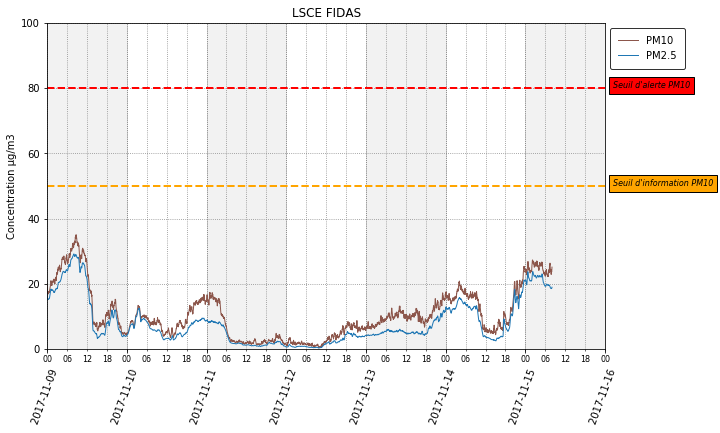

In [24]:
fig, ax = plt.subplots(figsize=(10,6))

#for i,var in enumerate(['PM-total', 'PM10', 'PM4', 'PM2.5', 'PM1']):
for i,var in enumerate(['PM10', 'PM2.5']):
    plt.plot(df_resampled.index.to_pydatetime(), df_resampled[var], linewidth=1, label=var, color=colors[i])
    
#ax.xaxis.set_major_locator(HourLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d    '))
ax.xaxis.set_major_locator(DayLocator(interval=1))

#ax.xaxis.set_minor_formatter(DateFormatter('%H'))
ax.xaxis.set_minor_locator(HourLocator(interval=6))
ax.xaxis.set_minor_formatter(DateFormatter('%H'))

x = ax.get_xlim()
ax.set_xlim([matplotlib.dates.date2num(dates[0]), matplotlib.dates.date2num(dates[-1])])
y = ax.get_ylim()
#ax.set_ylim([0, y[1]])
ax.set_ylim([0, 100])

xplace = matplotlib.dates.date2num(dates[-1])+0.1
ax.axhline(y=80, color='red', linewidth=2, linestyle='dashed')
ax.text(xplace, 80, "Seuil d'alerte PM10", ha='left', fontsize=8, style='italic', bbox=dict(facecolor='red'))

ax.axhline(y=50, color='orange', linewidth=2, linestyle='dashed')
ax.text(xplace, 50, "Seuil d'information PM10", ha='left', fontsize=8, style='italic', bbox=dict(facecolor='orange'))

plt.legend(loc=2, bbox_to_anchor=(1.0, 1.0), edgecolor='black', borderpad=0.8)
plt.title("LSCE FIDAS")
#plt.xlabel('Time')
plt.ylabel(u'Concentration μg/m3')
plt.grid(color='gray', axis='both', which='both', linestyle='dotted')

labels = ax.get_xmajorticklabels()
plt.setp(labels, rotation=70, fontsize=10)
labels = ax.get_xminorticklabels()
plt.setp(labels, fontsize=8)

for i in np.arange(0, len(dates), 2):
    #print dates[i]
    plt.axvspan(dates[i], dates[i]+datetime.timedelta(days=1), color='gray', alpha=0.1)

plt.savefig("GIF_FIDAS_0109.0a.png", bbox_inches='tight', dpi=100)

plt.show()

plt.close()